# Training Analysis
First let's create some helper functions so that we can visualize and track our training results.
For every training, we first run a learning rate run, to determine, which learning rate to use for the actual training. So each training has at least two runs.

In [8]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# helper functions for the plots

def plot_single_history(path_to_train_history, adjust_scales = False, title = ""):

    # Create a figure for plotting all folds
    fig, axes = plt.subplots(3, 2, figsize=(15, 10)) # To visualize both loss and accuracy
    axes = axes.ravel()

    alpha_all = 0.3
    alpha_avg = 0.7

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

    # Load the training history
    history = np.load(path_to_train_history, allow_pickle=True).item()
    
    # Plot the loss and accuracy for the current fold
    history_df = pd.DataFrame(history)

    history_df["loss_diff"] = history_df["loss"] - history_df["val_loss"]
    history_df["accuracy_diff"] = history_df["accuracy"] - history_df["val_accuracy"]

    # Plot training and validation loss
    history_df[['loss']].plot(ax=axes[0], color=colors[0], legend=False, alpha=alpha_all)
    axes[0].set_title('Training Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].grid(True)

    # Plot training and validation accuracy
    history_df[['accuracy']].plot(ax=axes[1], color=colors[0], legend=False, alpha=alpha_all)
    axes[1].set_title('Training Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].grid(True)

    history_df[["val_loss"]].plot(ax=axes[2], color=colors[0], legend=False, alpha=alpha_all)
    axes[2].set_title('Validation Loss')
    axes[2].set_xlabel('Epochs')
    axes[2].set_ylabel('Val Loss')
    axes[2].grid(True)
    val_loss_y_max = abs(history_df[["val_loss"]].max().values[0])
    # if the maximum value of the val loss is larger than 10, adjust the y-axis
    if adjust_scales:
        if val_loss_y_max > 10:
            axes[2].set_ylim(0, 3)

    history_df[["val_accuracy"]].plot(ax=axes[3], color=colors[0], legend=False, alpha=alpha_all)
    axes[3].set_title('Validation Accuracy')
    axes[3].set_xlabel('Epochs')
    axes[3].set_ylabel('Val Accuracy')
    axes[3].grid(True)

    history_df[["loss_diff"]].plot(ax=axes[4], color=colors[0], legend=False, alpha=alpha_all)
    axes[4].set_title('Loss Difference between Training and Validation')
    axes[4].set_xlabel('Epochs')
    axes[4].set_ylabel('Loss Difference')
    axes[4].grid(True)
    loss_diff_y_max = abs(history_df[["loss_diff"]].max().values[0])
    loss_diff_y_min = abs(history_df[["loss_diff"]].min().values[0])
    if adjust_scales:
        if loss_diff_y_max > 10 or loss_diff_y_min > 10:
            axes[4].set_ylim(-2, 2)

    history_df[["accuracy_diff"]].plot(ax=axes[5], color=colors[0], legend=False, alpha=alpha_all)
    axes[5].set_title('Accuracy Difference between Training and Validation')
    axes[5].set_xlabel('Epochs')
    axes[5].set_ylabel('Accuracy Difference')
    axes[5].grid(True)

    plt.tight_layout()

    if title != "":
        plt.suptitle(title)

    plt.show()

def plot_single_history_one_graph(path_to_train_history, epochs = 600, title = ""):
    path_to_lr_history = Path("/Users/LennartPhilipp/Desktop/Uni/Prowiss/training_histories/cutout/conv/conv_00_4_classes_run_2024_08_10_20_49_40/history.npy")

    history = np.load(path_to_train_history, allow_pickle=True).item()

    print(history.keys())

    pd.DataFrame(history)[["loss","val_loss", "accuracy","val_accuracy"]].plot(figsize=(8,5),
                            xlim=(0,epochs),
                            ylim=(0,3),
                            grid=True,
                            xlabel="Epochs",
                            style=["r-","b-"],)
    
    if title != "":
        plt.title(title)

    plt.show()
    

def plot_fold_histories(path_to_train_history, title = ""):
    # Define the base path to your training history files
    base_path_to_train_history = path_to_train_history

    # Create a figure for plotting all folds
    fig, axes = plt.subplots(3, 2, figsize=(15, 10)) # To visualize both loss and accuracy
    axes = axes.ravel()

    alpha_all = 0.3
    alpha_avg = 0.7

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

    loss_list = []
    val_loss_list = []
    accuracy_list = []
    val_accuracy_list = []
    loss_diff_list = []
    accuracy_diff_list = []

    # Loop through each fold and load the training history
    for fold in range(10):
        # Construct the path for the current fold
        path_to_train_history = base_path_to_train_history + f"{fold}.npy"

        # Load the training history
        history = np.load(path_to_train_history, allow_pickle=True).item()
        
        # Plot the loss and accuracy for the current fold
        history_df = pd.DataFrame(history)

        history_df["loss_diff"] = history_df["loss"] - history_df["val_loss"]
        history_df["accuracy_diff"] = history_df["accuracy"] - history_df["val_accuracy"]

        loss_list.append(history_df["loss"])
        val_loss_list.append(history_df["val_loss"])
        accuracy_list.append(history_df["accuracy"])
        val_accuracy_list.append(history_df["val_accuracy"])
        loss_diff_list.append(history_df["loss_diff"])
        accuracy_diff_list.append(history_df["accuracy_diff"])

        # Plot training and validation loss
        history_df[['loss']].plot(ax=axes[0], color=colors[fold], legend=False, alpha=alpha_all)
        axes[0].set_title('Training Loss (All Folds & Average)')
        axes[0].set_xlabel('Epochs')
        axes[0].set_ylabel('Loss')
        axes[0].grid(True)

        # Plot training and validation accuracy
        history_df[['accuracy']].plot(ax=axes[1], color=colors[fold], legend=False, alpha=alpha_all)
        axes[1].set_title('Training Accuracy (All Folds & Average)')
        axes[1].set_xlabel('Epochs')
        axes[1].set_ylabel('Accuracy')
        axes[1].grid(True)

        history_df[["val_loss"]].plot(ax=axes[2], color=colors[fold], legend=False, alpha=alpha_all)
        axes[2].set_title('Validation Loss (All Folds & Average)')
        axes[2].set_xlabel('Epochs')
        axes[2].set_ylabel('Val Loss')
        axes[2].grid(True)

        history_df[["val_accuracy"]].plot(ax=axes[3], color=colors[fold], legend=False, alpha=alpha_all)
        axes[3].set_title('Validation Accuracy (All Folds & Average)')
        axes[3].set_xlabel('Epochs')
        axes[3].set_ylabel('Val Accuracy')
        axes[3].grid(True)

        history_df[["loss_diff"]].plot(ax=axes[4], color=colors[fold], legend=False, alpha=alpha_all)
        axes[4].set_title('Loss Difference between Training and Validation (All Folds & Average)')
        axes[4].set_xlabel('Epochs')
        axes[4].set_ylabel('Loss Difference')
        axes[4].grid(True)

        history_df[["accuracy_diff"]].plot(ax=axes[5], color=colors[fold], legend=False, alpha=alpha_all)
        axes[5].set_title('Accuracy Difference between Training and Validation (All Folds & Average)')
        axes[5].set_xlabel('Epochs')
        axes[5].set_ylabel('Accuracy Difference')
        axes[5].grid(True)

    # Add a legend for clarity (for different folds)
    for i in range(6):
        axes[i].legend([f'Fold {i+1}' for i in range(10)], loc='upper right', fontsize='small')

    # Calculate average metrics across all folds
    avg_loss = pd.concat(loss_list, axis=1).mean(axis=1)
    avg_val_loss = pd.concat(val_loss_list, axis=1).mean(axis=1)
    avg_accuracy = pd.concat(accuracy_list, axis=1).mean(axis=1)
    avg_val_accuracy = pd.concat(val_accuracy_list, axis=1).mean(axis=1)
    avg_loss_diff = pd.concat(loss_diff_list, axis=1).mean(axis=1)
    avg_accuracy_diff = pd.concat(accuracy_diff_list, axis=1).mean(axis=1)

    avg_loss.plot(ax=axes[0], color='black', linestyle='-', label='Average Loss')
    avg_val_loss.plot(ax=axes[2], color='black', linestyle='-', label='Average Val Loss')

    avg_accuracy.plot(ax=axes[1], color='black', linestyle='-', label='Average Accuracy')
    avg_val_accuracy.plot(ax=axes[3], color='black', linestyle='-', label='Average Val Accuracy')

    avg_loss_diff.plot(ax=axes[4], color='black', linestyle='-', label='Average Loss Diff')
    avg_accuracy_diff.plot(ax=axes[5], color='black', linestyle='-', label='Average Accuracy Diff')

    plt.tight_layout()

    if title != "":
        plt.suptitle(title)
        
    plt.show()

def plot_lr_history(path_to_train_history, title = ""):

    path_to_train_history = path_to_train_history

    history = np.load(path_to_train_history, allow_pickle=True).item()

    plt.semilogx(history["lr"], history["loss"])
    plt.title("loss vs. learning rate")
    plt.axis([1e-8, 1e-1, 0, 3])

    if title != "":
        title = title + " - loss vs. learning rate"
        plt.title(title)

    print("Epochs: ", len(history["loss"]))

In [10]:
training_df = pd.DataFrame()
training_histories = {}

In [11]:
def add_training_history_to_df(path_to_train_history, model_architecture = "", training_description = "", training_modification = ""):
    
    global training_df

    data = np.load(path_to_train_history, allow_pickle=True).item()

    # Ensure the data contains the keys 'loss', 'val_loss', 'acc', and 'val_accuracy'
    val_loss = data['val_loss']
    val_accuracy = data['val_accuracy']

    # Calculate the desired metrics
    min_val_loss = np.around(np.min(val_loss), decimals=4)  # Minimum validation loss
    min_val_loss_index = np.argmin(val_loss)  # Epoch index of minimum validation loss
    val_accuracy_at_min_val_loss = np.around(val_accuracy[min_val_loss_index], decimals=4)  # Validation accuracy at minimum validation loss
    best_val_accuracy = np.around(np.max(val_accuracy), decimals=4)  # Best validation accuracy

    # Create a DataFrame to display the results

    # new_row = {
    #     (training_description, training_modification): {
    #         (model_architecture, "Min Val Loss"): min_val_loss,
    #         (model_architecture, "Val Accuracy at Min Val Loss"): val_accuracy_at_min_val_loss,
    #         (model_architecture, "Best Val Accuracy"): best_val_accuracy
    #     }
    # }

    training_histories[(training_description, model_architecture, training_modification)] = {
        "Min Val Loss": min_val_loss,
        "Val Accuracy at Min Val Loss": val_accuracy_at_min_val_loss,
        "Best Val Accuracy": best_val_accuracy
    }

    # new_row_df = pd.DataFrame.from_dict(new_row)

    # training_df = pd.concat([training_df, new_row_df], axis=0)


## Training 5 classes

### Control Conv

#### Learning Rate

Epochs:  400


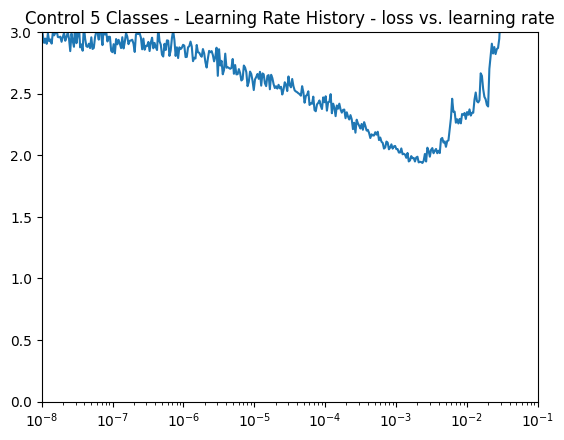

In [12]:
path_to_control_5_classes_lr_history = Path("/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/control_conv_5_classes/conv_00_5cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_lr_run_2025_06_20_15_10_22/history_conv_00_5cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_lr_run_2025_06_20_15_10_22.npy")

plot_lr_history(path_to_control_5_classes_lr_history, title="Control 5 Classes - Learning Rate History")

I'll pick a learning rate of 10^-3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


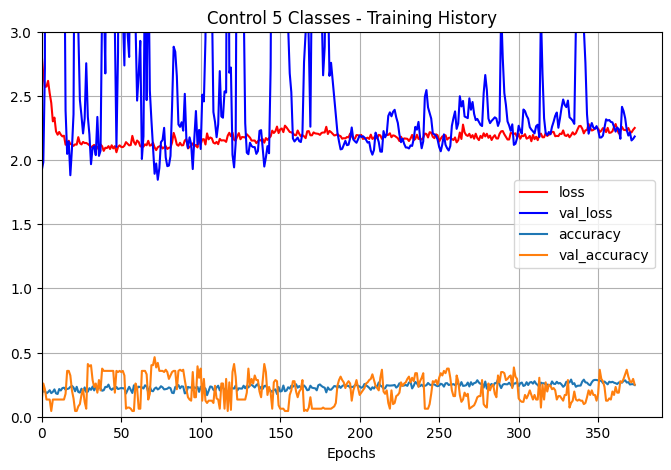

In [13]:
path_to_control_5_classes_train_history = Path("/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/control_conv_5_classes/conv_00_5cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_normal_run_2025_06_20_15_59_55/history_conv_00_5cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_normal_run_2025_06_20_15_59_55.npy")

plot_single_history_one_graph(path_to_control_5_classes_train_history, epochs=390, title="Control 5 Classes - Training History")

Best Epoch: 74

## Training 2 classes
### Control Conv

Epochs:  400


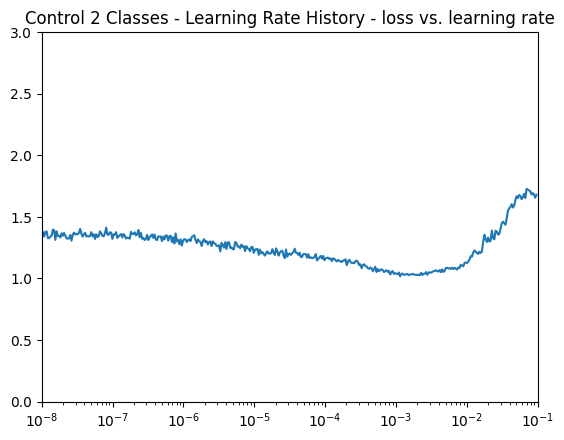

In [14]:
path_to_control_5_classes_lr_history = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/control_conv_2_classes/conv_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_lr_run_2025_06_20_16_23_04/history_conv_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_lr_run_2025_06_20_16_23_04.npy')

plot_lr_history(path_to_control_5_classes_lr_history, title="Control 2 Classes - Learning Rate History")

I'll pick a learning rate of 10^-3

dict_keys(['loss', 'accuracy', 'auc', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_auc', 'val_precision', 'val_recall'])


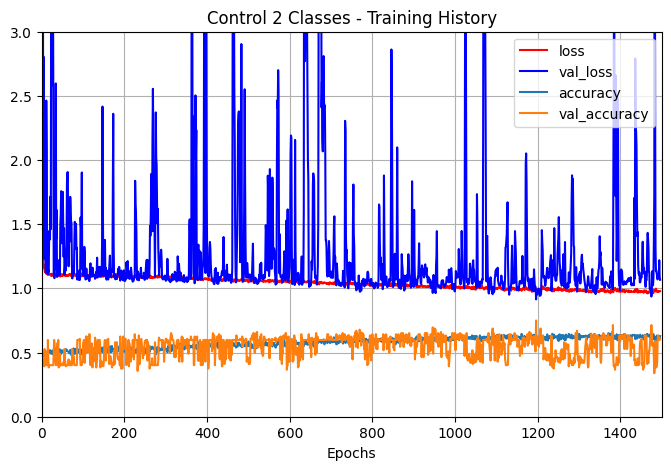

In [20]:
path_to_control_2_classes_train_history = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/control_conv_2_classes/conv_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_normal_run_2025_07_01_10_51_43/history_conv_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_normal_run_2025_07_01_10_51_43.npy')

plot_single_history_one_graph(path_to_control_2_classes_train_history, epochs=1500, title="Control 2 Classes - Training History")

Epoch 1197 \
21/21 [==============================] - 3s 119ms/step - loss: 0.9900 - accuracy: 0.6052 - auc: 0.6553 - precision: 0.6243 - recall: 0.6592 - val_loss: 0.9144 - val_accuracy: 0.7500 - val_auc: 0.7872 - val_precision: 0.6977 - val_recall: 0.6667
